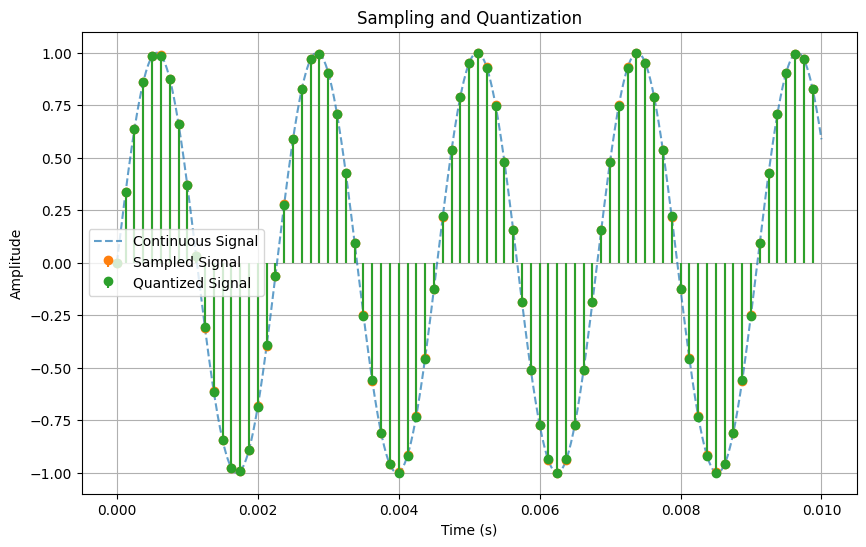

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 8000  # Sampling rate in Hz
duration = 0.01       # Duration of the signal in seconds
frequency = 440       # Frequency of the sine wave in Hz (A4 note)
bit_depth = 8         # Bit depth for quantization

# Generate a continuous sine wave
t_continuous = np.linspace(0, duration, 1000)  # High-resolution time for continuous signal
signal_continuous = np.sin(2 * np.pi * frequency * t_continuous)

# Simulate sampling
t_sampled = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
signal_sampled = np.sin(2 * np.pi * frequency * t_sampled)

# Quantization
quantization_levels = 2 ** bit_depth
signal_quantized = np.round((signal_sampled + 1) * (quantization_levels / 2 - 1)) / (quantization_levels / 2 - 1) - 1

# Plotting
plt.figure(figsize=(10, 6))

# Continuous signal
plt.plot(t_continuous, signal_continuous, label="Continuous Signal", linestyle="--", alpha=0.7)

# Sampled signal
plt.stem(t_sampled, signal_sampled, linefmt="C1-", markerfmt="C1o", basefmt=" ", label="Sampled Signal")

# Quantized signal
plt.stem(t_sampled, signal_quantized, linefmt="C2-", markerfmt="C2o", basefmt=" ", label="Quantized Signal")

plt.title("Sampling and Quantization")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

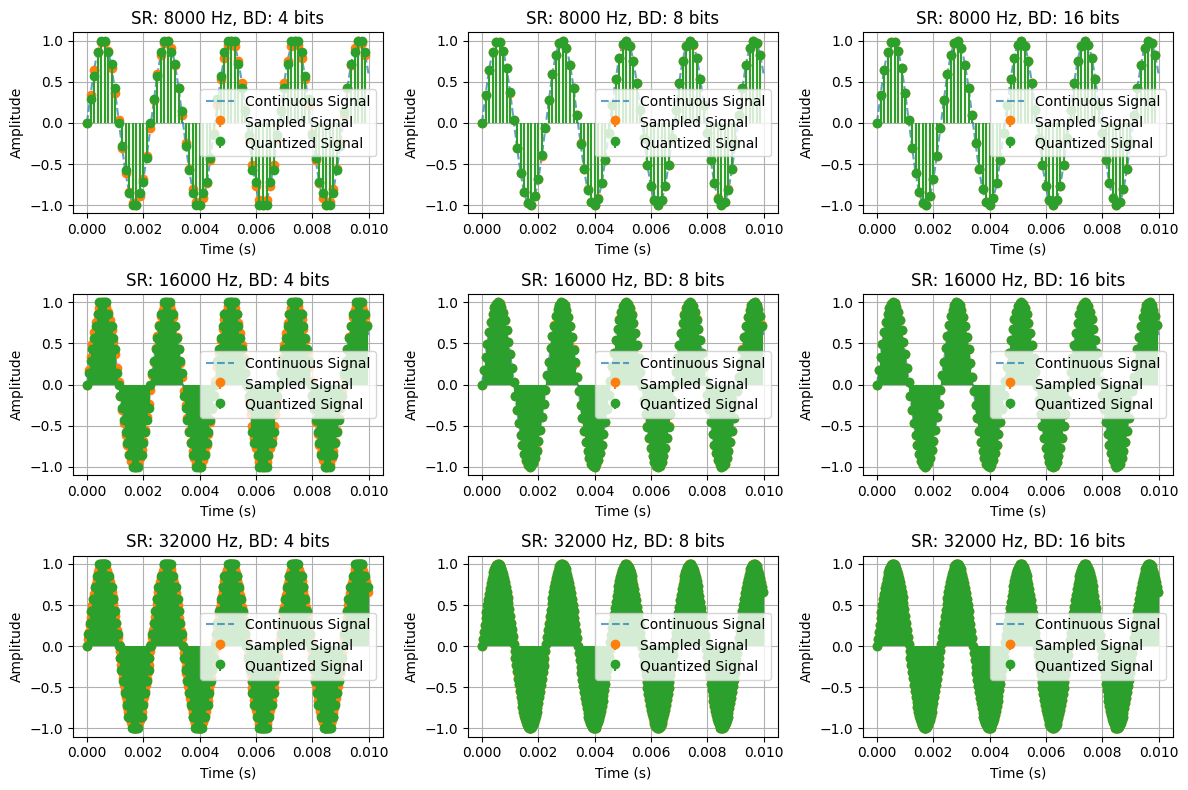

In [12]:
# Compare singal quantized using different bit depths and sampled using different sampling rates
def plot_quantization_comparison(frequency, sampling_rates, bit_depths, duration):
    t_continuous = np.linspace(0, duration, 1000)
    signal_continuous = np.sin(2 * np.pi * frequency * t_continuous)

    plt.figure(figsize=(12, 8))

    for i, sampling_rate in enumerate(sampling_rates):
        for j, bit_depth in enumerate(bit_depths):
            t_sampled = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
            signal_sampled = np.sin(2 * np.pi * frequency * t_sampled)

            quantization_levels = 2 ** bit_depth
            signal_quantized = np.round((signal_sampled + 1) * (quantization_levels / 2 - 1)) / (quantization_levels / 2 - 1) - 1

            plt.subplot(len(sampling_rates), len(bit_depths), i * len(bit_depths) + j + 1)
            plt.plot(t_continuous, signal_continuous, label="Continuous Signal", linestyle="--", alpha=0.7)
            plt.stem(t_sampled, signal_sampled, linefmt="C1-", markerfmt="C1o", basefmt=" ", label="Sampled Signal")
            plt.stem(t_sampled, signal_quantized, linefmt="C2-", markerfmt="C2o", basefmt=" ", label="Quantized Signal")
            plt.title(f"SR: {sampling_rate} Hz, BD: {bit_depth} bits")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.grid()

    plt.tight_layout()
    plt.show()
# Define different sampling rates and bit depths for comparison
sampling_rates = [8000, 16000, 32000]  # Different sampling rates in Hz
bit_depths = [4, 8, 16]               # Different bit depths for quantization
# Call the function to plot the comparison
plot_quantization_comparison(frequency, sampling_rates, bit_depths, duration)